In [1]:
using MXNet

### ネットワーク構築

In [2]:
mlp = @mx.chain mx.Variable(:data)             =>
  mx.FullyConnected(name=:fc1, num_hidden=128) =>
  mx.Activation(name=:relu1, act_type=:relu)   =>
  mx.FullyConnected(name=:fc2, num_hidden=64)  =>
  mx.Activation(name=:relu2, act_type=:relu)   =>
  mx.FullyConnected(name=:fc3, num_hidden=10)  =>
  mx.SoftmaxOutput(name=:softmax)

MXNet.mx.SymbolicNode(MXNet.mx.MX_SymbolHandle(Ptr{Void} @0x00007f83544ec2c0))

### ネットワーク確認（要：GraphViz）

In [3]:
# Pkg.add("IJuliaPortrayals")
using IJuliaPortrayals

GraphViz(mx.to_graphviz(mlp), engine="dot")

IJuliaPortrayals.GraphViz("digraph \"Network Visualization\" {\nnode [fontsize=10];\nedge [fontsize=10];\n\"fc1\"  [label=\"fc1\\nFullyConnected\\nnum-hidden=128\",style=\"rounded,filled\",fixedsize=true,width=1.3,fillcolor=\"#fb8072\",shape=box,penwidth=2,height=0.8034,color=\"#941305\"];\n\"relu1\"  [label=\"relu1\\nActivation\\nact-type=relu\",style=\"rounded,filled\",fixedsize=true,width=1.3,fillcolor=\"#ffffb3\",shape=box,penwidth=2,height=0.8034,color=\"#999900\"];\n\"fc2\"  [label=\"fc2\\nFullyConnected\\nnum-hidden=64\",style=\"rounded,filled\",fixedsize=true,width=1.3,fillcolor=\"#fb8072\",shape=box,penwidth=2,height=0.8034,color=\"#941305\"];\n\"relu2\"  [label=\"relu2\\nActivation\\nact-type=relu\",style=\"rounded,filled\",fixedsize=true,width=1.3,fillcolor=\"#ffffb3\",shape=box,penwidth=2,height=0.8034,color=\"#999900\"];\n\"fc3\"  [label=\"fc3\\nFullyConnected\\nnum-hidden=10\",style=\"rounded,filled\",fixedsize=true,width=1.3,fillcolor=\"#fb8072\",shape=box,penwidth=2,height=0.8034,color=\"#941305\"];\n\"softmax\"  [label=\"softmax\\nSoftmaxOutput\",style=\"rounded,filled\",fixedsize=true,width=1.3,fillcolor=\"#b3de69\",shape=box,penwidth=2,height=0.8034,color=\"#597d1c\"];\n\"relu1\" -> \"fc1\"  [arrowtail=open,color=\"#737373\",dir=back];\n\"fc2\" -> \"relu1\"  [arrowtail=open,color=\"#737373\",dir=back];\n\"relu2\" -> \"fc2\"  [arrowtail=open,color=\"#737373\",dir=back];\n\"fc3\" -> \"relu2\"  [arrowtail=open,color=\"#737373\",dir=back];\n\"softmax\" -> \"fc3\"  [arrowtail=open,color=\"#737373\",dir=back];\n}\n","dot","svg")

### データ取得

In [4]:
# data provider
batch_size = 100
include(Pkg.dir("MXNet", "examples", "mnist", "mnist-data.jl"))
train_provider, eval_provider = get_mnist_providers(batch_size)

(MXNet.mx.MXDataProvider(MXNet.mx.MX_DataIterHandle(Ptr{Void} @0x00007f8357213d80),Tuple{Symbol,Tuple}[(:data,(784,100))],Tuple{Symbol,Tuple}[(:softmax_label,(100,))],100,true,true),MXNet.mx.MXDataProvider(MXNet.mx.MX_DataIterHandle(Ptr{Void} @0x00007f83570ecae0),Tuple{Symbol,Tuple}[(:data,(784,100))],Tuple{Symbol,Tuple}[(:softmax_label,(100,))],100,true,true))

### データ確認（最初の3件）

In [5]:
using PyPlot

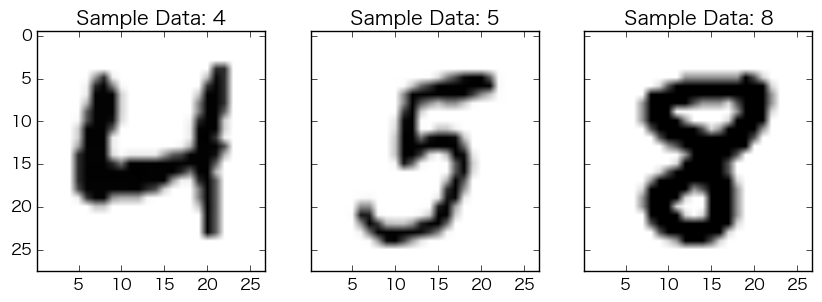

In [6]:
batch = first(train_provider)
images = copy(mx.get(train_provider, batch, :data))[:,1:3]
labels = copy(mx.get(train_provider, batch, :softmax_label))[1:3]

f, axs = PyPlot.subplots(1, 3, sharey=true, figsize=(10, 3))
for i = 1:3
    image = reshape(images[:,i], 28, 28)'
    axs[i][:imshow](image, cmap=get_cmap("Greys"))
    axs[i][:set_title]("Sample Data: $(round(Int, labels[i]))")
end

### モデル構築・最適化

In [7]:
# setup model
model = mx.FeedForward(mlp, context=mx.cpu())

MXNet.mx.FeedForward(MXNet.mx.SymbolicNode(MXNet.mx.MX_SymbolHandle(Ptr{Void} @0x00007f83544ec2c0)),[CPU0],#undef,#undef,#undef)

In [8]:
# optimization algorithm
optimizer = mx.SGD(lr=0.1, momentum=0.9)

MXNet.mx.SGD(MXNet.mx.SGDOptions(0.1,0.9,0,0.0001,MXNet.mx.LearningRate.Fixed(0.1),MXNet.mx.Momentum.Fixed(0.9)),#undef)

In [9]:
# fit parameters
mx.fit(model, optimizer, train_provider, n_epoch=20, eval_data=eval_provider)

INFO: Start training on [CPU0]
INFO: Initializing parameters...
INFO: Creating KVStore...
INFO: Start training...
INFO: == Epoch 001 ==========
INFO: ## Training summary
INFO:           accuracy = 0.7545
INFO:               time = 1.4791 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9528
INFO: == Epoch 002 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9568
INFO:               time = 1.0201 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9609
INFO: == Epoch 003 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9695
INFO:               time = 0.9753 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9685
INFO: == Epoch 004 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9774
INFO:               time = 1.0000 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9654
INFO: == Epoch 005 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9805
INFO:               

### 予測

In [10]:
probs = mx.predict(model, eval_provider)

10x10000 Array{Float32,2}:
 7.81381e-8   1.53593e-14  6.71295e-6   …  1.55999e-11  1.55867e-10
 5.25664e-8   5.57393e-13  0.994211        1.86104e-13  2.54311e-14
 2.54564e-8   1.0          0.00139613      3.31419e-13  1.73557e-14
 1.58018e-7   3.51367e-7   8.49593e-7      1.13605e-11  4.19289e-14
 6.12176e-9   6.72968e-16  0.000575345     6.12668e-15  6.27355e-14
 6.50195e-10  1.09174e-15  2.53289e-6   …  1.0          4.71024e-11
 9.37941e-11  1.75065e-15  6.14645e-6      8.97626e-9   1.0        
 0.999999     5.76618e-10  0.00317384      2.35438e-13  5.02e-17   
 5.91088e-9   9.72311e-14  0.000599935     2.6041e-8    1.17226e-11
 2.15218e-7   1.68127e-19  2.77223e-5      8.59973e-12  1.74276e-14

### 予測精度確認

In [11]:
# collect all labels from eval data
labels = Array[]
for batch in eval_provider
    push!(labels, copy(mx.get(eval_provider, batch, :softmax_label)))
end
labels = cat(1, labels...)

10000-element Array{Float32,1}:
 7.0
 2.0
 1.0
 0.0
 4.0
 1.0
 4.0
 9.0
 5.0
 9.0
 0.0
 6.0
 9.0
 ⋮  
 5.0
 6.0
 7.0
 8.0
 9.0
 0.0
 1.0
 2.0
 3.0
 4.0
 5.0
 6.0

In [12]:
# Now we use compute the accuracy
correct = 0
for i = 1:length(labels)
    # labels are 0...9
    if indmax(probs[:,i]) == labels[i]+1
        correct += 1
    end
end
accuracy = 100correct/length(labels)
println(mx.format("Accuracy on eval set: {1:.2f}%", accuracy))

Accuracy on eval set: 97.88%


### テストデータ予測結果確認（最初の3件）

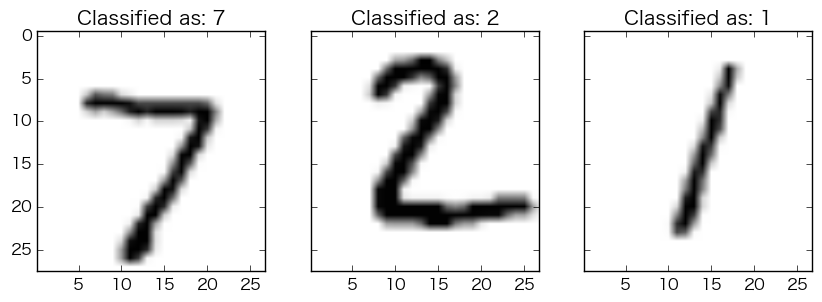

In [13]:
batch = first(eval_provider)
images = copy(mx.get(eval_provider, batch, :data))[:,1:3]

f, axs = PyPlot.subplots(1, 3, sharey=true, figsize=(10, 3))
for i = 1:3
    image = reshape(images[:,i], 28, 28)'
    axs[i][:imshow](image, cmap=get_cmap("Greys"))
    axs[i][:set_title]("Classified as: $(indmax(probs[:,i])-1)")
end